In [2]:
from raptor import Raptor, Analysis
import numpy as np
import cv2 as cv
import matplotlib

In [3]:
[i for i in dir(cv) if i.startswith('COLOR_RGB2')]

['COLOR_RGB2BGR',
 'COLOR_RGB2BGR555',
 'COLOR_RGB2BGR565',
 'COLOR_RGB2BGRA',
 'COLOR_RGB2GRAY',
 'COLOR_RGB2HLS',
 'COLOR_RGB2HLS_FULL',
 'COLOR_RGB2HSV',
 'COLOR_RGB2HSV_FULL',
 'COLOR_RGB2LAB',
 'COLOR_RGB2LUV',
 'COLOR_RGB2Lab',
 'COLOR_RGB2Luv',
 'COLOR_RGB2RGBA',
 'COLOR_RGB2XYZ',
 'COLOR_RGB2YCR_CB',
 'COLOR_RGB2YCrCb',
 'COLOR_RGB2YUV',
 'COLOR_RGB2YUV_I420',
 'COLOR_RGB2YUV_IYUV',
 'COLOR_RGB2YUV_YV12']

In [3]:
a_rgb = Analysis('31-12-2021_0_rgb.data', path="data/")

C:\ProgramData\Anaconda3\envs\ovni\lib\site-packages\seaborn_image\_context.py:128: UserWarning: Trying to register the cmap 'deep' which already exists.
  register_cmap(name=cmap, cmap=cmap_mpl)


array([[[ 39,  71, 255],
        [ 39,  71, 255],
        [ 13,  74, 255],
        ...,
        [  0,  81, 255],
        [  0,  76, 255],
        [  0,  74, 255]]])

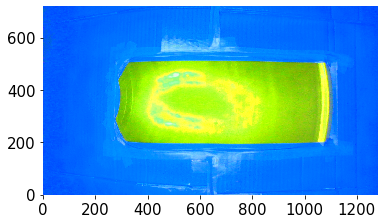

In [4]:
bgr_array = np.array(a_rgb.data['data'][0]['image'])
matplotlib.pyplot.imshow(bgr_array)
bgr_array[:1]

array([[[0.15294118, 0.2784314 , 1.        ],
        [0.15294118, 0.2784314 , 1.        ],
        [0.05098039, 0.2901961 , 1.        ],
        ...,
        [0.        , 0.31764707, 1.        ],
        [0.        , 0.29803923, 1.        ],
        [0.        , 0.2901961 , 1.        ]]], dtype=float32)

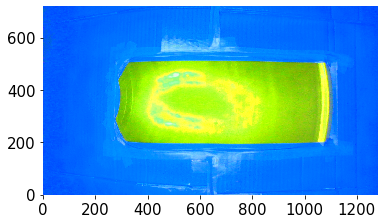

In [5]:
bgr_array = bgr_array.astype('float32')
bgr_array = bgr_array / 255
matplotlib.pyplot.imshow(bgr_array)
bgr_array[:1]

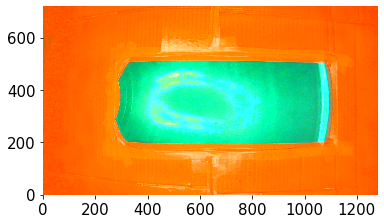

In [7]:
rgb_array = cv.cvtColor(bgr_array, cv.COLOR_BGR2RGB)
matplotlib.pyplot.imshow(rgb_array)

In [8]:
hsv_array = cv.cvtColor(rgb_array, cv.COLOR_RGB2HSV)
#matplotlib.pyplot.imshow(hsv_array)
hsv_array[:1]

array([[[ 8.888887 ,  0.8470587,  1.       ],
        [ 8.888887 ,  0.8470587,  1.       ],
        [15.123966 ,  0.9490195,  1.       ],
        ...,
        [19.058823 ,  0.9999999,  1.       ],
        [17.88235  ,  0.9999999,  1.       ],
        [17.411764 ,  0.9999999,  1.       ]]], dtype=float32)

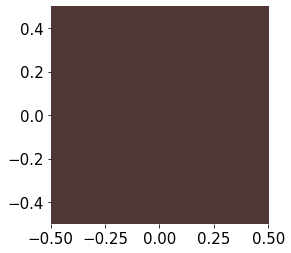

In [89]:
lower_orange = np.array([5/360, 80/255, 80/255])
plot_orange = matplotlib.colors.hsv_to_rgb(lower_orange)
matplotlib.pyplot.imshow([[plot_orange]])

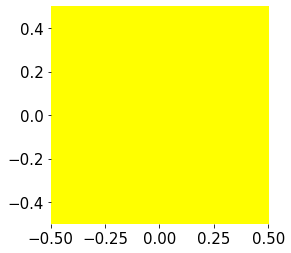

In [84]:
upper_orange = np.array([60/360, 255/255, 255/255])
plot_orange = matplotlib.colors.hsv_to_rgb(upper_orange)
matplotlib.pyplot.imshow([[plot_orange]])

In [91]:
lower_orange = np.array([5, 80/255, 80/255])
upper_orange = np.array([60, 255/255, 255/255])

mask = cv.inRange(hsv_array, lower_orange, upper_orange)
mask = ~mask
res = cv.bitwise_and(rgb_array, rgb_array, mask=mask)
#matplotlib.pyplot.imshow(mask)

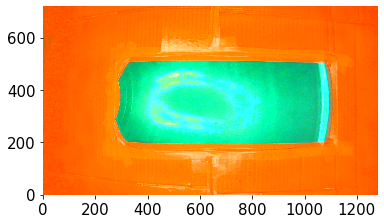

In [22]:
matplotlib.pyplot.imshow(rgb_array)

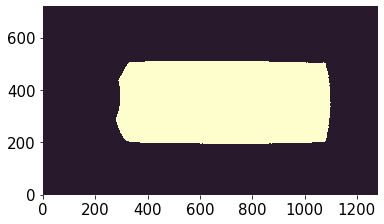

In [90]:
matplotlib.pyplot.imshow(mask)

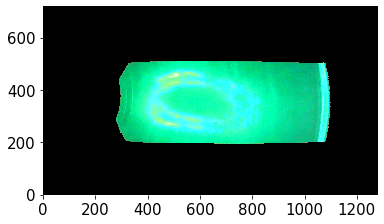

In [24]:
matplotlib.pyplot.imshow(res)

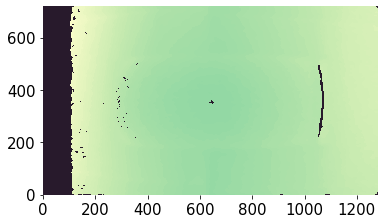

In [25]:
d = Analysis('31-12-2021_0_depth.data', path="data/")
depth_array = np.array(d.data['data'][0]['image'])
matplotlib.pyplot.imshow(depth_array)

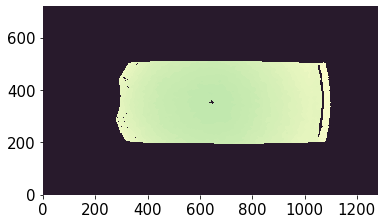

In [26]:
res_depth = cv.bitwise_and(depth_array, depth_array, mask=mask)
matplotlib.pyplot.imshow(res_depth)